# KNN
- Classifies unlabeled data points by assingining them the class of similar labeled data points
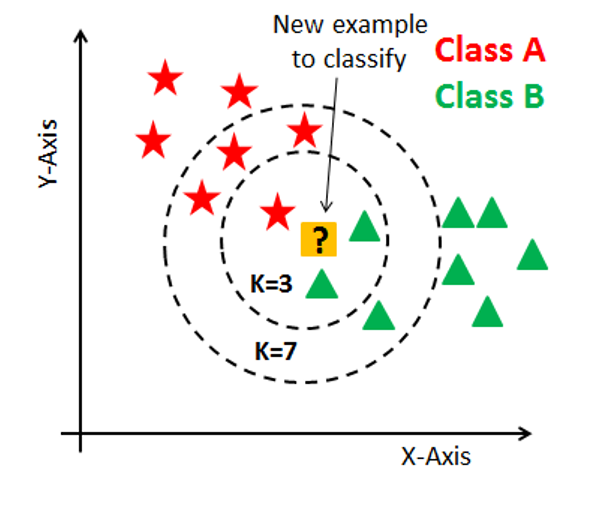

## Example

In [64]:
#The following dataset is given
training_points = [
    [158, 58],
    [158, 59],
    [158, 63],
    [160, 59],
    [160, 60],
    [163, 60],
    [163, 61],
    [160, 64],
    [163, 64],
    [165, 61],
    [165, 62],
    [165, 65],
    [168, 62],
    [168, 63],
    [168, 66],
    [170, 63],
    [170, 64],
    [170, 68]
]

training_labels = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [65]:
#We want to find the class of the following point
unknown_points = [
    [170, 67],
]

#Learning with KNN algorithm when K=3
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3) #k=3
classifier.fit(training_points, training_labels)

guesses = classifier.predict(unknown_points)

print(guesses)

[1]


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.2, random_state=4)
# Test dataset is 20% and training dataset is 80%
# data is randomly assigned unless you use random_state hyperparameter

In [67]:
#We want to find the class of the following point
unknown_points = [
    [170, 67],
]

#Learning with KNN algorithm when K=3
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3) #k=3
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

print(guesses)

[1 0 1 1]


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(confusion_matrix(y_test, guesses))

print(metrics.accuracy_score(y_test, guesses))

print(metrics.precision_score(y_test, guesses, average='binary'))

print(metrics.recall_score(y_test, guesses, average='binary'))

print(metrics.f1_score(y_test, guesses, average='binary'))

[[1 1]
 [0 2]]
0.75
0.6666666666666666
1.0
0.8


## Practice

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

df = pd.read_csv('./data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [101]:
print(df.shape)
print(df.info())

(1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [70]:
X, y = df.drop(columns = 'target'), df['target']

In [71]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [72]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


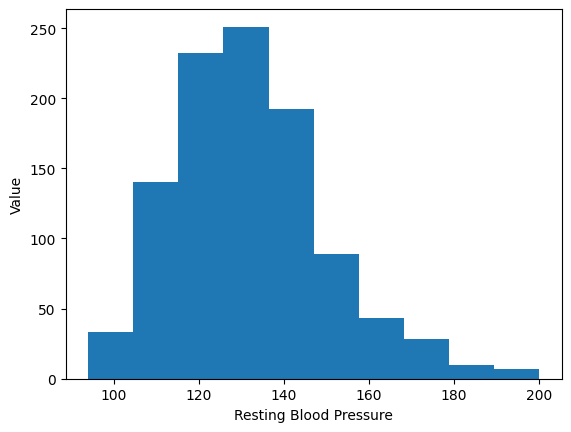

In [73]:
plt.hist(df['trestbps'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

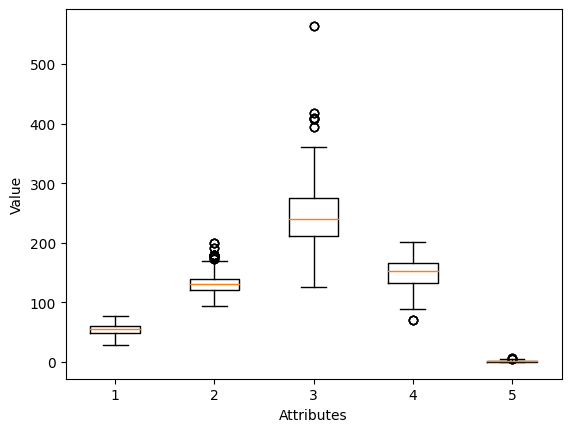

In [74]:
data_to_boxplot = [df['age'], df['trestbps'], df['chol'], 
                    df['thalach'], df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [75]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(717, 13)
(717,)
(308, 13)
(308,)


In [77]:
classifier = KNeighborsClassifier(n_neighbors = 5) #k=5
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 1 1 0 1]
[[115  41]
 [ 35 117]]
0.7532467532467533


[0.9772727272727273, 0.9318181818181818, 0.8668831168831169, 0.814935064935065, 0.7532467532467533, 0.7402597402597403, 0.7305194805194806, 0.7142857142857143, 0.7175324675324676, 0.7435064935064936, 0.7337662337662337, 0.75, 0.7207792207792207, 0.711038961038961, 0.711038961038961, 0.7077922077922078, 0.698051948051948, 0.698051948051948, 0.7012987012987013, 0.711038961038961, 0.7077922077922078, 0.698051948051948, 0.6883116883116883, 0.7012987012987013, 0.7045454545454546, 0.685064935064935, 0.6915584415584416, 0.6818181818181818, 0.7012987012987013, 0.698051948051948, 0.6948051948051948, 0.6883116883116883, 0.698051948051948, 0.6915584415584416, 0.6818181818181818, 0.6915584415584416, 0.7012987012987013, 0.6948051948051948, 0.698051948051948, 0.6883116883116883, 0.6818181818181818, 0.6948051948051948, 0.6883116883116883, 0.685064935064935, 0.6753246753246753, 0.6883116883116883, 0.6883116883116883, 0.7012987012987013, 0.7045454545454546]


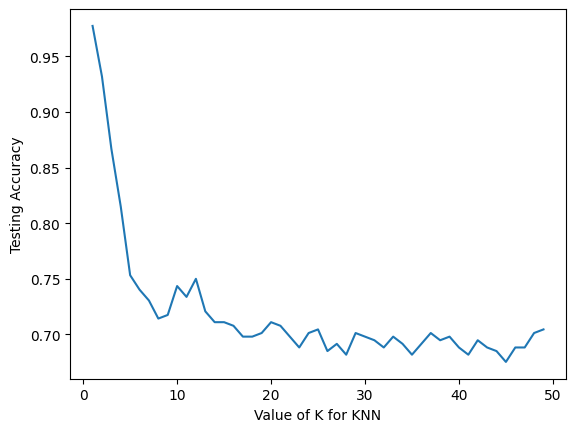

In [78]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### Standard Scaler

In [89]:
from sklearn.preprocessing import StandardScaler

#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()

features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.3, random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(717, 13)
(717,)
(308, 13)
(308,)


In [91]:
classifier = KNeighborsClassifier(n_neighbors = 5) #k=5
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 1 0 0 1 0 1 1 1 1 1 1]
[[126  30]
 [ 18 134]]
0.8441558441558441


[1.0, 0.9675324675324676, 0.9253246753246753, 0.8863636363636364, 0.8441558441558441, 0.8538961038961039, 0.8733766233766234, 0.8701298701298701, 0.8409090909090909, 0.8668831168831169, 0.8409090909090909, 0.8409090909090909, 0.8311688311688312, 0.8538961038961039, 0.8636363636363636, 0.8603896103896104, 0.8441558441558441, 0.8344155844155844, 0.8311688311688312, 0.8344155844155844, 0.8409090909090909, 0.827922077922078, 0.814935064935065, 0.814935064935065, 0.8181818181818182, 0.8181818181818182, 0.814935064935065, 0.8084415584415584, 0.8181818181818182, 0.8181818181818182, 0.8116883116883117, 0.8051948051948052, 0.8051948051948052, 0.8051948051948052, 0.7954545454545454, 0.801948051948052, 0.801948051948052, 0.7987012987012987, 0.801948051948052, 0.801948051948052, 0.8181818181818182, 0.8181818181818182, 0.8214285714285714, 0.8214285714285714, 0.8214285714285714, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8214285714285714]


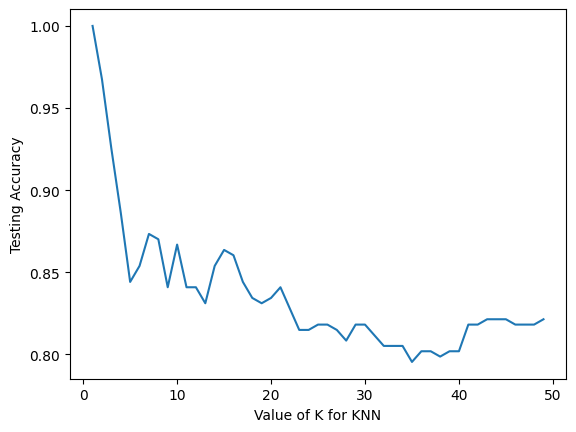

In [92]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### Min-Max Scaler

In [93]:
from sklearn.preprocessing import MinMaxScaler

#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = MinMaxScaler()

features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.3, random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(717, 13)
(717,)
(308, 13)
(308,)


In [95]:
classifier = KNeighborsClassifier(n_neighbors = 5) #k=5
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0
 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 1]
[[136  20]
 [ 23 129]]
0.8603896103896104


[0.9902597402597403, 0.948051948051948, 0.935064935064935, 0.8798701298701299, 0.8603896103896104, 0.8506493506493507, 0.8766233766233766, 0.8668831168831169, 0.8701298701298701, 0.8668831168831169, 0.8474025974025974, 0.8506493506493507, 0.8571428571428571, 0.8636363636363636, 0.8668831168831169, 0.8441558441558441, 0.8344155844155844, 0.8441558441558441, 0.8506493506493507, 0.8571428571428571, 0.8538961038961039, 0.8571428571428571, 0.8571428571428571, 0.8506493506493507, 0.8474025974025974, 0.8506493506493507, 0.8441558441558441, 0.8311688311688312, 0.8409090909090909, 0.8376623376623377, 0.8376623376623377, 0.8538961038961039, 0.8474025974025974, 0.8441558441558441, 0.8474025974025974, 0.8506493506493507, 0.8506493506493507, 0.8441558441558441, 0.8441558441558441, 0.8441558441558441, 0.8441558441558441, 0.8311688311688312, 0.827922077922078, 0.8311688311688312, 0.8409090909090909, 0.8409090909090909, 0.8376623376623377, 0.8376623376623377, 0.8376623376623377]


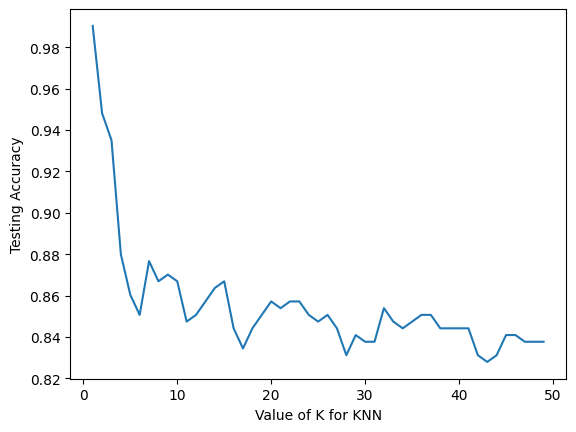

In [96]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### Robust Scaler

In [97]:
from sklearn.preprocessing import RobustScaler

#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()

features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.3, random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(717, 13)
(717,)
(308, 13)
(308,)


In [99]:
classifier = KNeighborsClassifier(n_neighbors = 5) #k=5
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 1]
[[136  20]
 [ 21 131]]
0.8668831168831169


[1.0, 0.9707792207792207, 0.9383116883116883, 0.8928571428571429, 0.8668831168831169, 0.8701298701298701, 0.8766233766233766, 0.8766233766233766, 0.8603896103896104, 0.8538961038961039, 0.8571428571428571, 0.8441558441558441, 0.8344155844155844, 0.8474025974025974, 0.8733766233766234, 0.8668831168831169, 0.8474025974025974, 0.8474025974025974, 0.8506493506493507, 0.8538961038961039, 0.8311688311688312, 0.8311688311688312, 0.8376623376623377, 0.8506493506493507, 0.8344155844155844, 0.8376623376623377, 0.8376623376623377, 0.827922077922078, 0.8344155844155844, 0.827922077922078, 0.8246753246753247, 0.8214285714285714, 0.8311688311688312, 0.8311688311688312, 0.8214285714285714, 0.8214285714285714, 0.8116883116883117, 0.8116883116883117, 0.8116883116883117, 0.8214285714285714, 0.8116883116883117, 0.8116883116883117, 0.8116883116883117, 0.8214285714285714, 0.8214285714285714, 0.8214285714285714, 0.814935064935065, 0.814935064935065, 0.814935064935065]


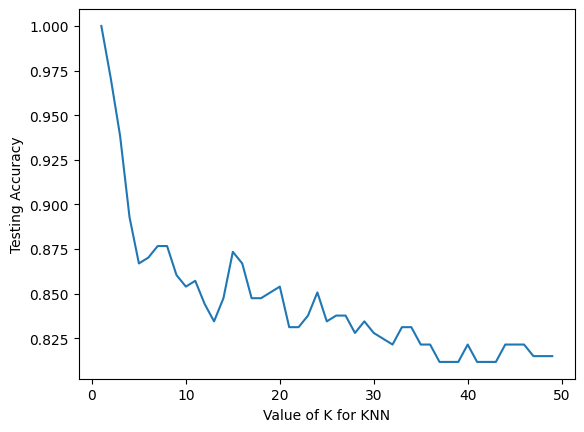

In [100]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()